
## Probar diferentes modelos

In [1]:
!git clone https://github.com/josegarciav/MMA-Thesis

Cloning into 'MMA-Thesis'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 49 (delta 9), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (49/49), done.


In [2]:
#Cambiar el directorio al folder del git clone
!pwd
import os
os.chdir('/content/MMA-Thesis')
!pwd

/content
/content/MMA-Thesis


In [ ]:
#!pip install tensorflow==1.15.0  #Cambiar la version de tensorflow actual

Nota: Crear manualmente una carpeta llamada `results en el directorio actual donde se puedan guardar los resultados. 

In [6]:
!python LBFGS_TR.py -m=25 -minibatch=1000 -num-batch=4 -method='trust-region' -maxiter=100
# Correr el modelo convolucional en MNIST con L-BFGS


Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.




2022-10-03 04:14:23.855169: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library 

In [7]:
import pickle
DATA_PATH = "/content/MMA-Thesis/results/results_experiment_FEB_23_trust-region_m_25_n_4.pkl"
infile = open(DATA_PATH,'rb')
best_model1 = pickle.load(infile) #Modelo L-BFGS bajo la estrategia de region de confianza con m=25
#best_model1

In [8]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 18})
plt.rc('font', family='serif')
plt.style.use('seaborn-muted')

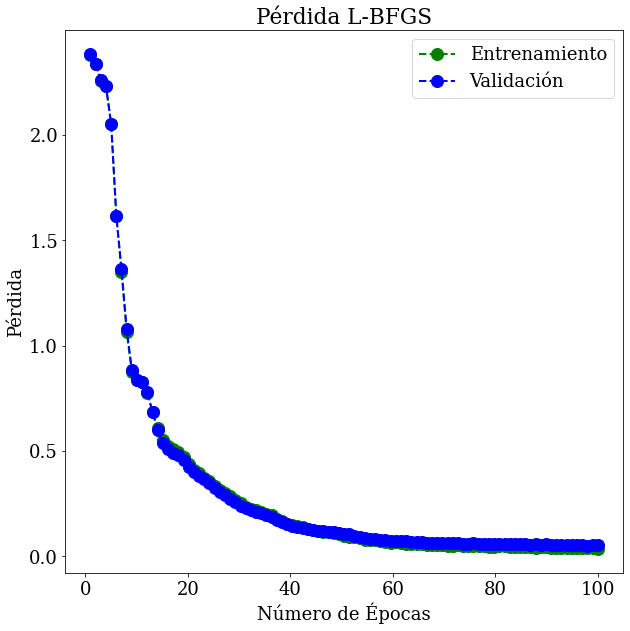

In [9]:
'''
    Mostrar resultados para L-BFGS
    -- m=25 (parametro de la memoria del hessiano)
    -- Estrategia de Busqueda de Linea
    -- minibatch size = 1000
    -- Numero de batches = 5
    -- Usar toda la data para computar los gradientes = True (OJO CAMBIAR CODIGO FUENTE)
'''

maxiter=100 # Maximo numero de iteraciones establecido anteriormente

plt.subplots(figsize = (10, 10))
plt.plot(np.linspace(1, maxiter, len(best_model1[0])), best_model1[0],
         color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.plot(np.linspace(1, maxiter, len(best_model1[1])), best_model1[1],
         color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=12)
#plt.plot(np.linspace(1, maxiter, len(best_model1[2])), best_model1[2],
#         color='red', marker='o', linestyle='dashed', linewidth=2, markersize=12)

plt.yscale("linear")
plt.title('Pérdida L-BFGS', fontweight='normal')
plt.ylabel('Pérdida')
plt.xlabel('Número de Épocas')
plt.legend(['Entrenamiento', 'Validación'], loc='upper right') #, 'Prueba'

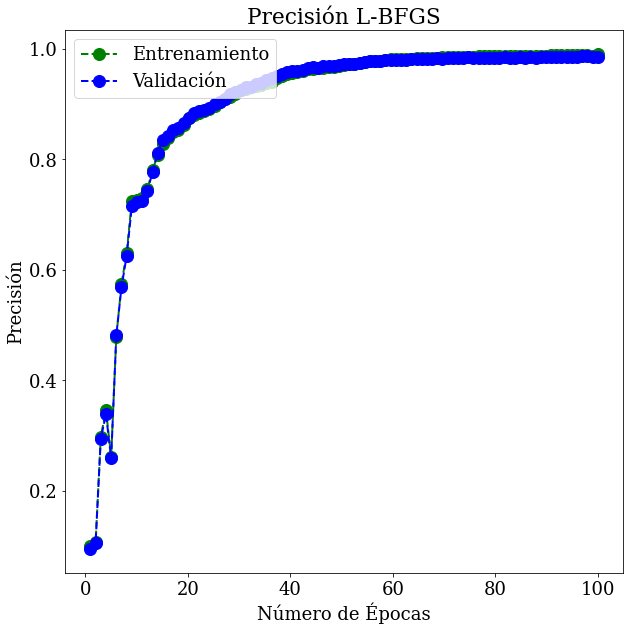

In [10]:
plt.subplots(figsize = (10,10))
plt.plot(np.linspace(1, maxiter, len(best_model1[3])), best_model1[3],
         color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.plot(np.linspace(1, maxiter, len(best_model1[4])), best_model1[4],
         color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=12)
#plt.plot(np.linspace(1, maxiter, len(best_model1[5])), best_model1[5],
#         color='red', marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.yscale("linear")
plt.title('Precisión L-BFGS', fontweight='normal')
plt.ylabel('Precisión')
plt.xlabel('Número de Épocas')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left') # , 'Prueba'